In [15]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [16]:
# Load CSV
cars = pd.read_csv('../data/autoscout24-germany-dataset.csv')
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011


In [17]:
# Inspect range of mileage:
print(cars.mileage.min())
print(cars.mileage.max())

0
1111111


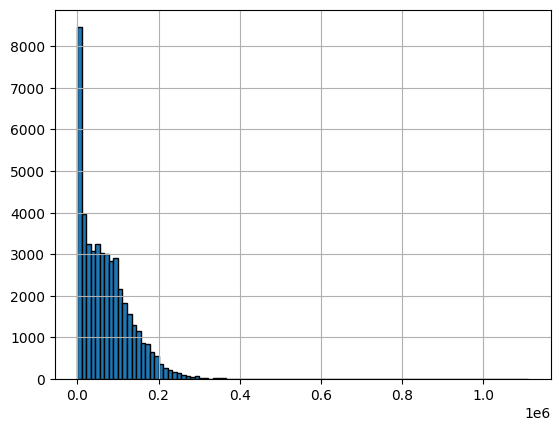

In [18]:
# Nearly all cars have a mileage below 200k: 
cars.mileage.hist(bins=100, ec='black');

In [19]:
# Binning accordingly (-1 ensures that cars with a mileage of 0 are inside 1st bin):
intervals = [-1, 50000, 100000, 150000, 200000, float('inf')]
labels = ['under 50k', 'under 100k', 'under 150k', 'under 200k', 'over 200k']
cars['mileage_bins'] = pd.cut(cars.mileage, bins=intervals, labels=labels)

In [20]:
# Plotting a pie plot.
# 1. Calculating the counts per category:
mileage_counts = cars.mileage_bins.value_counts()
mileage_counts

mileage_bins
under 50k     20493
under 100k    13507
under 150k     7444
under 200k     3350
over 200k      1611
Name: count, dtype: int64

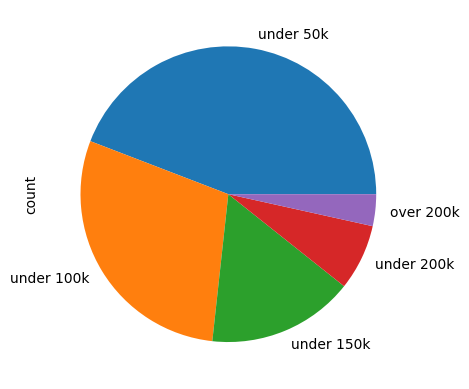

In [21]:
# 2. Making the pie:
mileage_counts.plot(kind='pie');

In [22]:
# Checking different years against that total pie
cars.year.nunique()

11

In [23]:
year_counts = []
for year in range(2011, 2022):
    # order by index
    cars_year = cars.query(f'year == {year}')
    year_mileage_counts = cars_year.mileage_bins.value_counts()\
        .reindex(['under 50k', 'under 100k', 'under 150k', 'under 200k', 'over 200k'])
    year_counts.append(year_mileage_counts)

In [24]:
year_counts

[mileage_bins
 under 50k      194
 under 100k    1214
 under 150k    1427
 under 200k     826
 over 200k      451
 Name: count, dtype: int64,
 mileage_bins
 under 50k      290
 under 100k    1471
 under 150k    1348
 under 200k     721
 over 200k      391
 Name: count, dtype: int64,
 mileage_bins
 under 50k      444
 under 100k    1768
 under 150k    1261
 under 200k     512
 over 200k      281
 Name: count, dtype: int64,
 mileage_bins
 under 50k      649
 under 100k    1913
 under 150k    1044
 under 200k     396
 over 200k      178
 Name: count, dtype: int64,
 mileage_bins
 under 50k      955
 under 100k    1970
 under 150k     793
 under 200k     328
 over 200k      168
 Name: count, dtype: int64,
 mileage_bins
 under 50k     1389
 under 100k    1891
 under 150k     640
 under 200k     267
 over 200k       79
 Name: count, dtype: int64,
 mileage_bins
 under 50k     1800
 under 100k    1661
 under 150k     548
 under 200k     169
 over 200k       45
 Name: count, dtype: int64,
 milea

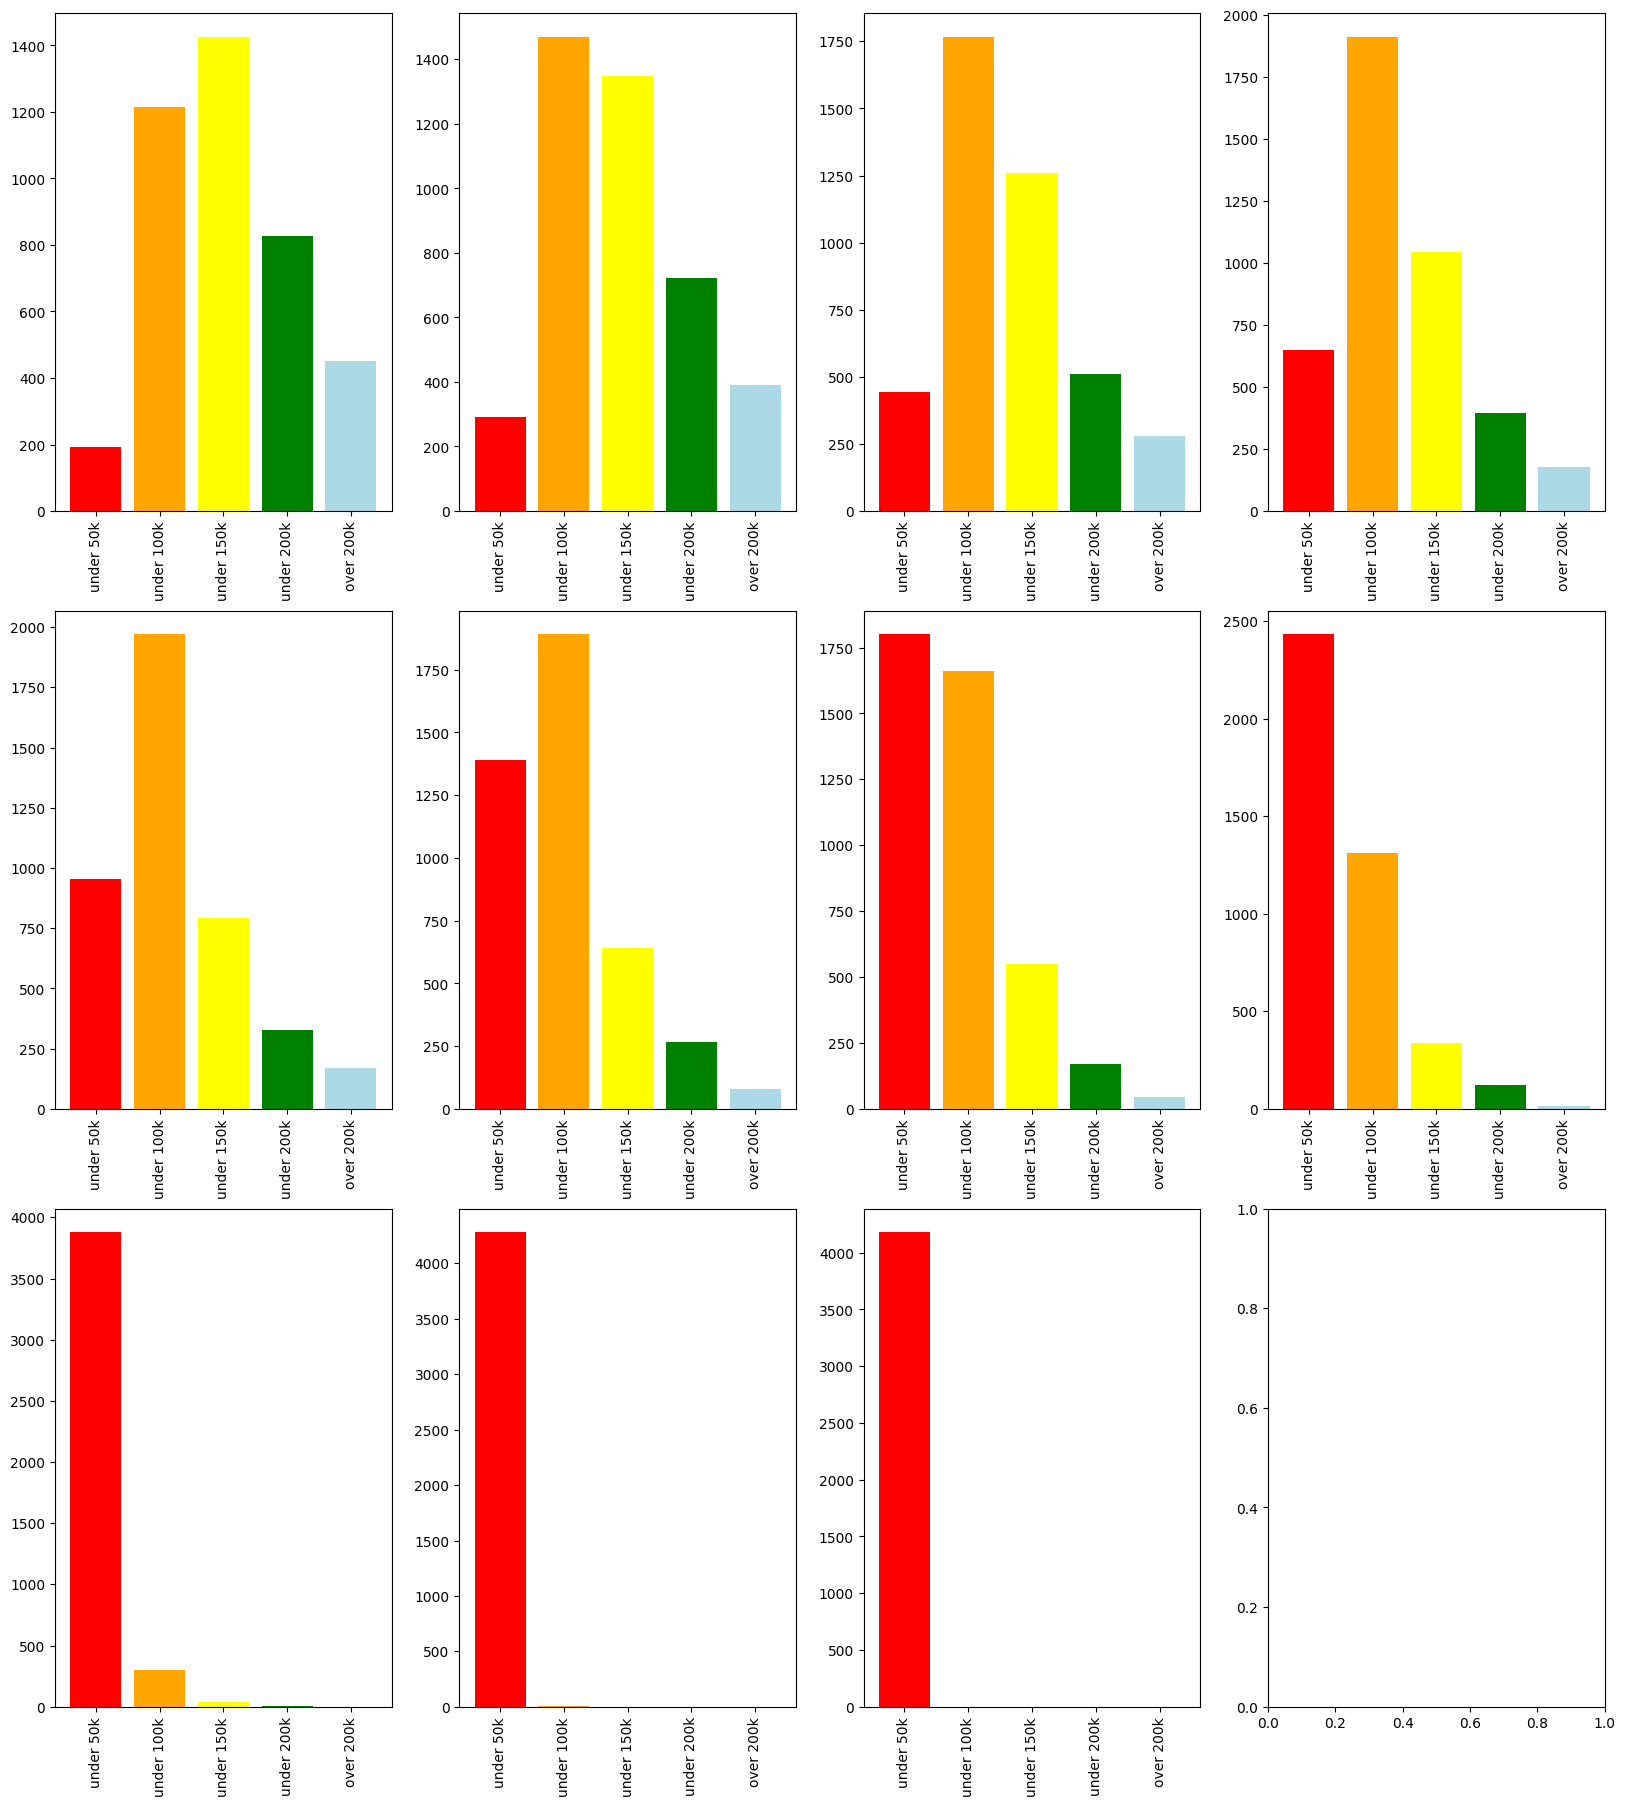

In [25]:
# There is a trend in the data:
colors = ['red', 'orange', 'yellow', 'green', 'lightblue']

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4)
fig.set_size_inches(20, 22)
ax1.bar(height=year_counts[0], x=year_counts[0].index, color=colors)
ax1.tick_params('x', labelrotation=90)

ax2.bar(height=year_counts[1], x=year_counts[1].index, color=colors)
ax2.tick_params('x', labelrotation=90)

ax3.bar(height=year_counts[2], x=year_counts[2].index, color=colors)
ax3.tick_params('x', labelrotation=90)

ax4.bar(height=year_counts[3], x=year_counts[3].index, color=colors)
ax4.tick_params('x', labelrotation=90)

ax5.bar(height=year_counts[4], x=year_counts[4].index, color=colors)
ax5.tick_params('x', labelrotation=90)

ax6.bar(height=year_counts[5], x=year_counts[5].index, color=colors)
ax6.tick_params('x', labelrotation=90)

ax7.bar(height=year_counts[6], x=year_counts[6].index, color=colors)
ax7.tick_params('x', labelrotation=90)

ax8.bar(height=year_counts[7], x=year_counts[7].index, color=colors)
ax8.tick_params('x', labelrotation=90)

ax9.bar(height=year_counts[8], x=year_counts[8].index, color=colors)
ax9.tick_params('x', labelrotation=90)

ax10.bar(height=year_counts[9], x=year_counts[9].index, color=colors)
ax10.tick_params('x', labelrotation=90)

ax11.bar(height=year_counts[10], x=year_counts[10].index, color=colors)
ax11.tick_params('x', labelrotation=90)

In [26]:
# Check for the max value (should be in category 'over 200k')
cars.query('mileage >= 1111111')

,mileage,make,model,fuel,gear,offerType,price,hp,year,mileage_bins
16869,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490.0,73.0,2019,over 200k


In [27]:
# Exporting result as CSV:
cars.to_csv(r'..\data\autoscout24_edited.csv', index=False)